In [32]:
import matplotlib.pyplot as plt 
import numpy as np

In [97]:
A = np.array([2,4,6])
B = np.array([1,2,3])

A / B

array([2., 2., 2.])

In [116]:
#N-spins, tmax, chain-type, closed (True) or open ev (False),
# gaussian or non gaussian (True/False), projected or not projected (True/False), runtimes

                    #N, t, chain, closed ev, g, me1/2, proj, runtime
XYZ_ng_nruntimes = [[2, 150, "XYZ", True, False, None, True, 14.217307806015015],
                [2, 150, "XYZ", True, False, None, False, 19.227618932724],
                [3, 150, "XYZ", True, False, None, True, 29.540655612945557],
                [3, 150, "XYZ", True, False, None, False, 41.265960454940796],
                [4, 150, "XYZ", True, False, None, True, 64.70103096961975],
                [4, 150, "XYZ", True, False, None, False, 93.84485411643982],
                [5, 150, "XYZ", True, False, None, True, 121.04314804077148],
                [5, 150, "XYZ", True, False, None, False, 184.6067271232605],
                [6, 150, "XYZ", True, False, None, True, 232.26160335540771],
                [6, 150, "XYZ", True, False, None, False, 363.71801376342773],
                [7, 150, "XYZ", True, False, None, True, 501.6643707752228],
                [7, 150, "XYZ", True, False, None, False, 782.2341196537018],
                [8, 150, "XYZ", True, False, None, True, 1519.732511997223],
                [8, 150, "XYZ", True, False, None, False, 2181.0677406787872]]

XYZ_me2_runtimes = [[2, 150, "XYZ", True, True,  "2", True, 14.908568382263184],
                [2, 150, "XYZ", True, True,  "2", False, 19.974685192108154],
                [3, 150, "XYZ", True, True,  "2", True,  33.591487407684326],
                [3, 150, "XYZ", True, True,  "2", False, 49.008915185928345],
                [4, 150, "XYZ", True, True,  "2", True, 78.05957865715027 ],
                [4, 150, "XYZ", True, True,  "2", False, 119.03892469406128],
                [5, 150, "XYZ", True, True,  "2", True, 168.90370535850525],
                [5, 150, "XYZ", True, True,  "2", False, 271.0498991012573],
                [6, 150, "XYZ", True, True,  "2", True, 469.4776887893677],
                [6, 150, "XYZ", True, True , "2", False, 727.5727114677429],
                [7, 150, "XYZ", True, True , "2", True, 2115.0916724205017],
                [7, 150, "XYZ", True, True , "2", False, 3080.1174986362457],
                [8, 150, "XYZ", True, True , "2", True, 1519.732511997223],
                [8, 150, "XYZ", True, True , "2", False, 2181.0677406787872]]


spin_length = [2,3,4,5,6,7,8]
xyz_projected_ng_runtimes = np.array([14.217307806015015, 29.540655612945557, 64.70103096961975, 121.04314804077148, 232.26160335540771, 501.6643707752228, 1519.732511997223])
xyz_non_projected_ng_runtimes = np.array([19.227618932724, 41.265960454940796, 93.84485411643982, 184.6067271232605, 363.71801376342773, 782.2341196537018, 2181.0677406787872])

xyz_projected_me2_runtimes = np.array([14.908568382263184, 33.591487407684326, 78.05957865715027, 168.90370535850525, 469.4776887893677,  2115.0916724205017, 1519.732511997223])
xyz_non_projected_me2_runtimes = np.array([19.974685192108154, 49.008915185928345, 119.03892469406128, 271.0498991012573, 727.5727114677429, 3080.1174986362457, 2181.0677406787872])

In [107]:
def plot_regression_line(x_data, y_data, b):
    y_pred = [b[0] + b[1]*x_data[i] for i in range(len(x_data))]
  
    plt.plot(x_data, y_pred, color = "g", label = "Fitted line log t v. N")
  
    plt.scatter(spin_length, np.log(xyz_non_projected_runtimes), color = "r", label="log-scale Exact runtimes")

    plt.xlabel("Spin length N")
    plt.ylabel("log-runtimes [s]")
    plt.title("Runtimes")
    plt.legend()
    return None

def estimate_coef(x_data, y_data):
    if (np.size(x_data) == np.size(y_data)):
        n = np.size(x_data)
    else:
        raise("Error")
        
    mu_x = np.mean(x_data); mu_y = np.mean(y_data)
  
    S_xy = np.sum(y_data[i] * x_data[i] for i in range(n)) - n * mu_y *mu_x
    S_xx = np.sum(x_data[i] * x_data[i] for i in range(n)) - n * mu_x**2
    b_1 = S_xy/S_xx
    b_0 = mu_y - b_1 * mu_x
  
    return (b_0, b_1)

def linear_regression(x,y, visualization = False):
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
    
    if visualization: 
        plot_regression_line(x, y, b)
    return b

Estimated coefficients:
b_0 = 1.4130808675970221            
b_1 = 0.7654512313313627


C:\Users\tomas\AppData\Local\Temp\ipykernel_9528\4291372774.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  S_xy = np.sum(y_data[i] * x_data[i] for i in range(n)) - n * mu_y *mu_x
C:\Users\tomas\AppData\Local\Temp\ipykernel_9528\4291372774.py:23: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  S_xx = np.sum(x_data[i] * x_data[i] for i in range(n)) - n * mu_x**2


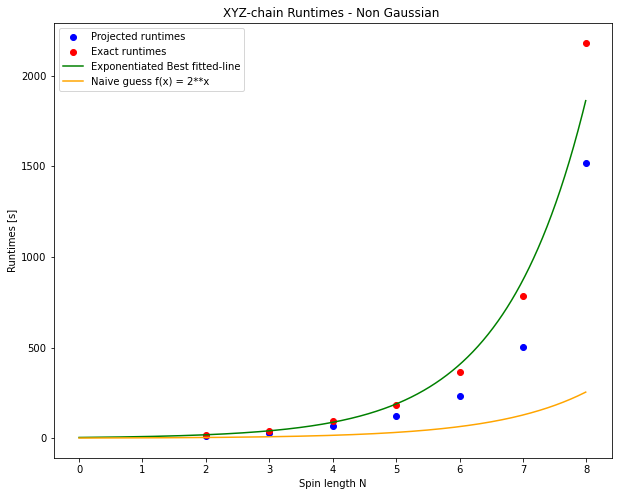

In [109]:
x = np.arange(0.0, 8.0, 0.01)

def fitted_line(b):
    return np.exp(b[0] + b[1]*x)

plt.figure(figsize=(10, 8))

plt.scatter(spin_length, xyz_projected_ng_runtimes, color = "b", label="Projected runtimes")
plt.scatter(spin_length, xyz_non_projected_ng_runtimes, color = "r", label="Exact runtimes")
plt.plot(x, fitted_line(linear_regression(spin_length, np.log(xyz_non_projected_ng_runtimes), False)),
         color = "green", label="Exponentiated Best fitted-line")
plt.plot(x, 2**x, color = "orange", label="Naive guess f(x) = 2**x")
plt.xlabel("Spin length N")
plt.ylabel("Runtimes [s]")
plt.title("XYZ-chain Runtimes - Non Gaussian ")
plt.legend()

In [82]:
linear_regression(spin_length, np.log(xyz_non_projected_runtimes), False)

Estimated coefficients:
b_0 = 1.523725546012189            
b_1 = 0.7352754099454079


C:\Users\tomas\AppData\Local\Temp\ipykernel_9528\4291372774.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  S_xy = np.sum(y_data[i] * x_data[i] for i in range(n)) - n * mu_y *mu_x
C:\Users\tomas\AppData\Local\Temp\ipykernel_9528\4291372774.py:23: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  S_xx = np.sum(x_data[i] * x_data[i] for i in range(n)) - n * mu_x**2


(1.523725546012189, 0.7352754099454079)

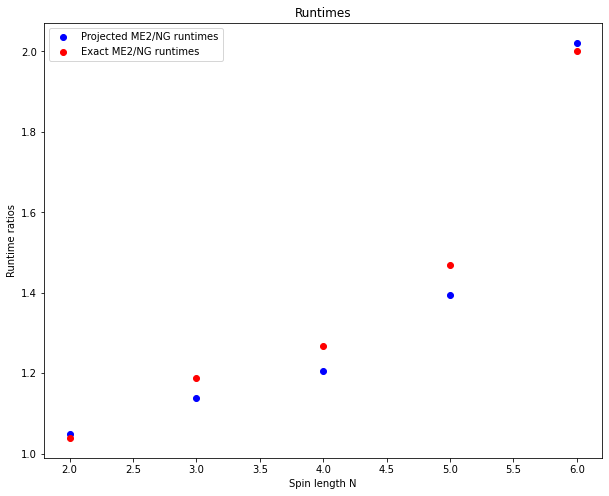

In [122]:
plt.figure(figsize=(10, 8))
plt.scatter(spin_length[:5], (xyz_projected_ng_runtimes[:5] / xyz_projected_me2_runtimes[:5])**-1, color = "b", label="Projected ME2/NG runtimes")
plt.scatter(spin_length[:5], (xyz_non_projected_ng_runtimes[:5] / xyz_non_projected_me2_runtimes[:5])**-1, color = "r", label="Exact ME2/NG runtimes")
plt.xlabel("Spin length N")
plt.ylabel("Runtime ratios")
plt.title("Runtimes")
plt.legend()

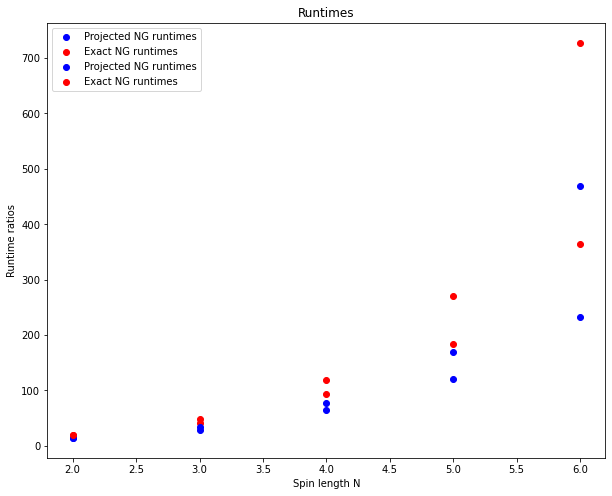

In [125]:
plt.figure(figsize=(10, 8))
plt.scatter(spin_length[:5], (xyz_projected_ng_runtimes[:5]), color = "b", label="Projected NG runtimes")
plt.scatter(spin_length[:5], (xyz_non_projected_ng_runtimes[:5]), color = "r", label="Exact NG runtimes")
plt.scatter(spin_length[:5], (xyz_projected_me2_runtimes[:5]), color = "b", label="Projected NG runtimes")
plt.scatter(spin_length[:5], (xyz_non_projected_me2_runtimes[:5]), color = "r", label="Exact NG runtimes")
plt.xlabel("Spin length N")
plt.ylabel("Runtime ratios")
plt.title("Runtimes")
plt.legend()